In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import gzip
from astropy.modeling import models, fitting

In [123]:
stix_spec_fits=fits.open('solar_orbiter/solo_L1_stix-sci-xray-spec_20220815T071650-20230420T203125_V01_2112090001-51104.fits' )

In [125]:
stix_spec_fits.info()

Filename: solar_orbiter/solo_L1_stix-sci-xray-spec_20220815T071650-20230420T203125_V01_2112090001-51104.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      75   ()      
  1  CONTROL       1 BinTableHDU    111   1R x 13C   [I, I, J, I, B, I, 98A, 74A, 3B, 3B, 32B, 33B, D]   
  2  DATA          1 BinTableHDU     90   7R x 9C   [J, J, I, B, 12B, E, 31I, 31E, B]   
  3  IDB_VERSIONS    1 BinTableHDU     36   1R x 3C   [7A, D, D]   
  4  ENERGIES      1 BinTableHDU     36   31R x 3C   [B, E, E]   


In [126]:
def spectrum_plot(stix_spec_fits):
    
    print('This code will simply plot the spectra from solo_L1_stix-sci-xray-spec*****.fits files')
    print('\n')
    print(stix_spec_fits.info())
    print('\n')
    
    #data hdu contains details of counts from the source
    Data=stix_spec_fits[2].data
    counts=Data['counts'][0]  #there are 7 arrays in the list so I selected any one of them as they donthave much diff
    print('Printing column info of data hdu', Data.columns)
    print('\n')
    #energy hdu contains the energy,channel information
    energy=stix_spec_fits[4].data
    energy_low=energy['e_low']
    energy_high=energy['e_high']
    avg_energy=0.5*(energy_low+energy_high)
    channels=energy['channel']
    print('Printing column info of the data hdu', energy.columns)
    
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.title('Channel vs counts plot/Spectra from STIX')
    plt.xlabel('channel')
    plt.ylabel('counts')
    plt.plot(channels,counts)
    plt.scatter(channels,counts,c='red', marker='*')
    
    plt.subplot(1,2,2)
    plt.title('Energy vs counts plot/Spectra from STIX')
    plt.xlabel('energies in kev')
    plt.ylabel('counts')
    plt.plot(avg_energy,counts)
    plt.scatter(avg_energy,counts,c='red', marker='*')
    
    
    
    
    

This code will simply plot the spectra from solo_L1_stix-sci-xray-spec*****.fits files


Filename: solar_orbiter/solo_L1_stix-sci-xray-spec_20220815T071650-20230420T203125_V01_2112090001-51104.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      75   ()      
  1  CONTROL       1 BinTableHDU    111   1R x 13C   [I, I, J, I, B, I, 98A, 74A, 3B, 3B, 32B, 33B, D]   
  2  DATA          1 BinTableHDU     90   7R x 9C   [J, J, I, B, 12B, E, 31I, 31E, B]   
  3  IDB_VERSIONS    1 BinTableHDU     36   1R x 3C   [7A, D, D]   
  4  ENERGIES      1 BinTableHDU     36   31R x 3C   [B, E, E]   
None


Printing column info of data hdu ColDefs(
    name = 'time'; format = 'J'; unit = 'cs'; bscale = 1; bzero = 2147483648
    name = 'timedel'; format = 'J'; unit = 'cs'; bscale = 1; bzero = 2147483648
    name = 'triggers'; format = 'I'; bscale = 1; bzero = 32768
    name = 'rcr'; format = 'B'
    name = 'pixel_masks'; format = '12B'; dim = '(12)'
    n

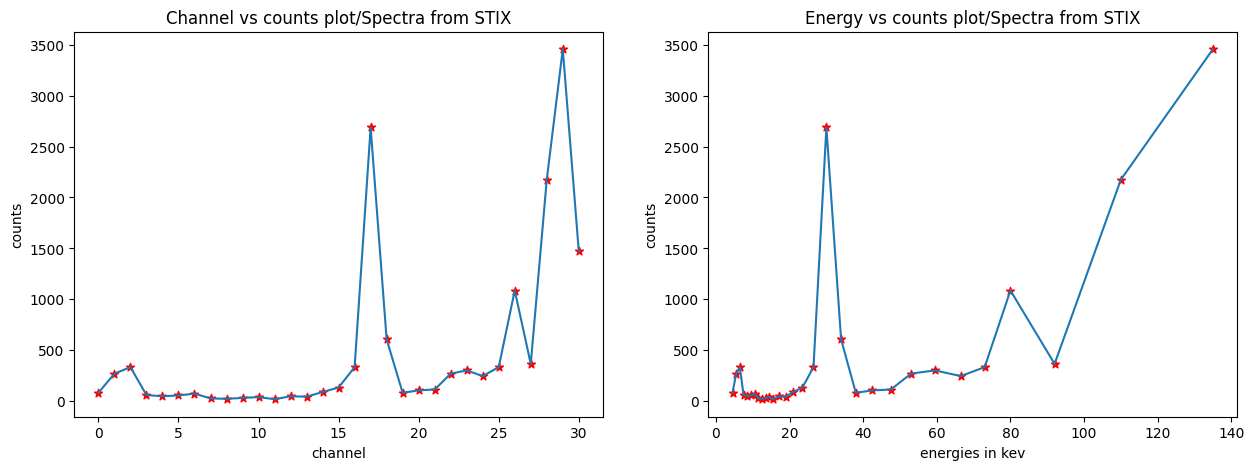

In [127]:
spectrum_plot(stix_spec_fits)